<a href="https://colab.research.google.com/github/aimiliavaitsi/Reddit-PubMed-Scrapping-and-Sentiment-Analysis/blob/main/PUBMED_LAST_VERSION_18_000_articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetching articles for year 2010...
Total count for 2010: 1959


<ipython-input-2-bb724e02ae5e>:136: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(articles)], ignore_index=True)


Fetching articles for year 2011...
Total count for 2011: 2112
Fetching articles for year 2012...
Total count for 2012: 2270
Fetching articles for year 2013...
Total count for 2013: 2777
Fetching articles for year 2014...
Total count for 2014: 2926
Fetching articles for year 2015...
Total count for 2015: 3094
Fetching articles for year 2016...
Total count for 2016: 3413
Fetching articles for year 2017...
Total count for 2017: 3757
Fetching articles for year 2018...
Total count for 2018: 3953
Fetching articles for year 2019...
Total count for 2019: 4628
Fetching articles for year 2020...
Total count for 2020: 5669
Fetching articles for year 2021...
Total count for 2021: 6625
Fetching articles for year 2022...
Total count for 2022: 6846
Fetching articles for year 2023...
Total count for 2023: 6938
Fetching articles for year 2024...
Total count for 2024: 4198


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Total number of articles scraped: 18373


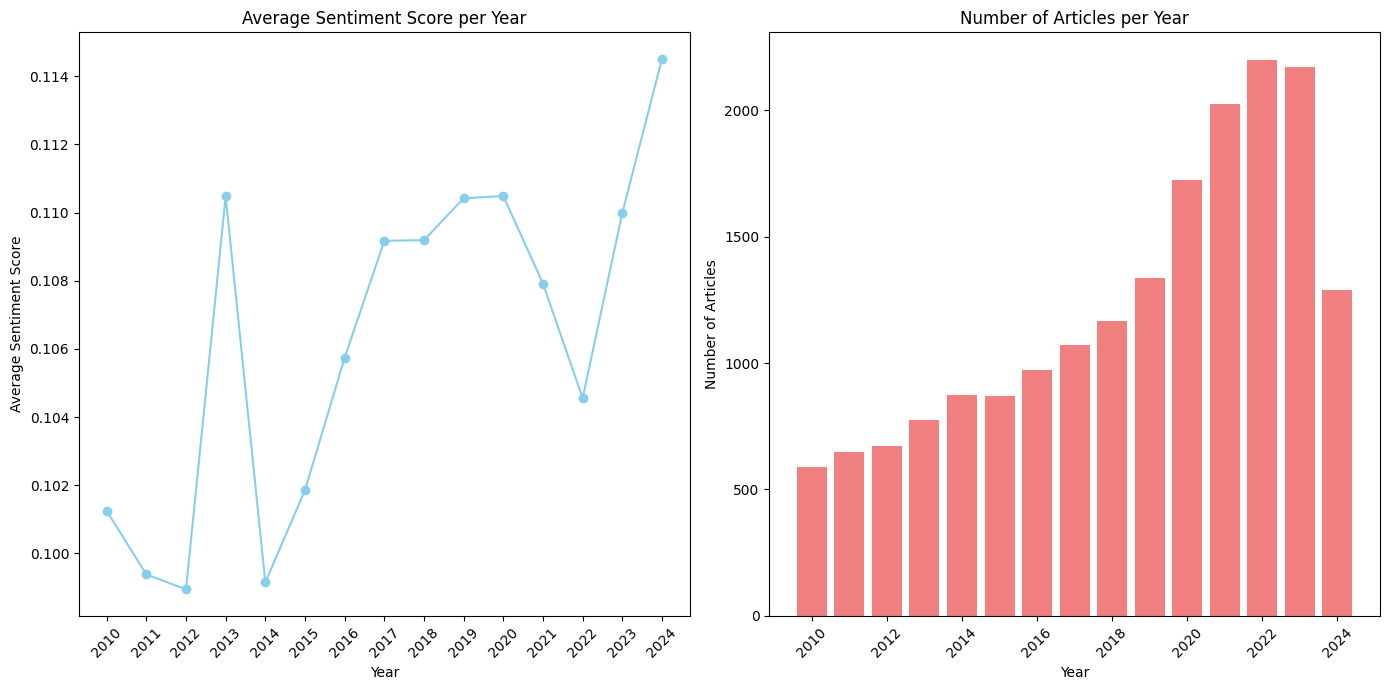

In [ ]:
# Install required packages
!pip install biopython textblob matplotlib openpyxl

import pandas as pd
from Bio import Entrez
from google.colab import files
from textblob import TextBlob
import matplotlib.pyplot as plt
import datetime
import math
import time

# Set the email address to avoid any potential issues with Entrez
Entrez.email = 'your.email@example.com'

# Function to perform sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns sentiment polarity score

# Function to count keyword occurrences
def count_keywords(text, keywords):
    text_lower = text.lower()
    count = sum(text_lower.count(keyword) for keyword in keywords)
    return count

# Function to search PubMed and fetch articles
def fetch_articles(year):
    date_range = f'("{year}/01/01"[Date - Create] : "{year}/12/31"[Date - Create])'
    full_query = f'({" OR ".join(topics)}) AND {date_range}'

    # Initial search to find out the number of records
    handle = Entrez.esearch(db='pubmed', retmax=1, term=full_query)
    record = Entrez.read(handle)
    total_count = int(record['Count'])
    print(f"Total count for {year}: {total_count}")

    articles = []
    if total_count > 0:
        # Calculate the number of batches needed
        batches = math.ceil(total_count / 100)

        for batch in range(batches):
            retstart = batch * 100
            handle = Entrez.esearch(db='pubmed', retmax=100, retstart=retstart, term=full_query)
            record = Entrez.read(handle)
            id_list = record['IdList']

            if id_list:
                # Fetch detailed information for each record
                fetch_handle = Entrez.efetch(db='pubmed', id=','.join(id_list), retmode='xml')
                records = Entrez.read(fetch_handle)

                # Process each PubMed article in the response
                for record in records['PubmedArticle']:
                    title = record['MedlineCitation']['Article']['ArticleTitle']
                    abstract = ' '.join(record['MedlineCitation']['Article']['Abstract']['AbstractText']) if 'Abstract' in record['MedlineCitation']['Article'] and 'AbstractText' in record['MedlineCitation']['Article']['Abstract'] else ''
                    # Extract the publication year from the publication date
                    pub_date = record['MedlineCitation']['Article']['Journal']['JournalIssue']['PubDate']
                    year_str = pub_date.get('Year', 'N/A')

                    # Ensure the year is within the desired range and is a valid integer
                    if year_str.isdigit() and 2010 <= int(year_str) <= 2024:
                        # Check keyword occurrence
                        abstract_count = count_keywords(abstract, keyword_list)
                        if abstract_count >= 2:
                            sentiment_score = analyze_sentiment(abstract)
                            articles.append({
                                'Title': title,
                                'Abstract': abstract,
                                'Year': year_str,
                                'Sentiment': sentiment_score
                            })

                # Sleep to avoid hitting the rate limit
                time.sleep(1)
    return articles

# Define topics and date range
topics = [
    'bioplastic[Title/Abstract]',
    'bioplastics[Title/Abstract]',
    'bio-plastic[Title/Abstract]',
    'natural plastic[Title/Abstract]',
    'biodegradable plastic[Title/Abstract]',
    'sustainable plastic[Title/Abstract]',
    'biopolymers[Title/Abstract]',
    'bio-based plastic[Title/Abstract]',
    'compostable plastic[Title/Abstract]',
    'renewable plastic[Title/Abstract]',
    'plant-based plastic[Title/Abstract]',
    'green plastic[Title/Abstract]',
    'eco-friendly plastic[Title/Abstract]',
    'algae-based plastic[Title/Abstract]',
    'PHA plastic[Title/Abstract]',
    'PLA plastic[Title/Abstract]',
    'polyhydroxyalkanoates[Title/Abstract]',
    'polylactic acid[Title/Abstract]',
    'biodegradable polymer[Title/Abstract]',
    'biodegradable materials[Title/Abstract]',
    'bio-derived plastic[Title/Abstract]',
    'cellulose-based plastic[Title/Abstract]',
    'starch-based plastic[Title/Abstract]',
    'bio-composite[Title/Abstract]',
    'sustainable polymer[Title/Abstract]',
    'biomaterial[Title/Abstract]',
    'biodegradation[Title/Abstract]',
    'marine biodegradable plastic[Title/Abstract]',
    'enzyme degradation plastic[Title/Abstract]',
    'lignin-based plastic[Title/Abstract]',
    'chitosan plastic[Title/Abstract]',
    'microbial plastic[Title/Abstract]'
]

# Keyword list for counting occurrences
keyword_list = [
    'bioplastic', 'bioplastics', 'natural plastic', 'biodegradable plastic', 'sustainable plastic', 'biopolymers',
    'bio-based plastic', 'compostable plastic', 'renewable plastic', 'plant-based plastic', 'green plastic',
    'eco-friendly plastic', 'algae-based plastic', 'PHA plastic', 'PLA plastic', 'polyhydroxyalkanoates',
    'polylactic acid', 'biodegradable polymer', 'biodegradable materials', 'bio-derived plastic', 'cellulose-based plastic',
    'starch-based plastic', 'bio-composite', 'sustainable polymer', 'biomaterial', 'biodegradation',
    'marine biodegradable plastic', 'enzyme degradation plastic', 'lignin-based plastic', 'chitosan plastic', 'microbial plastic'
]

# Prepare DataFrame to store the results
df = pd.DataFrame(columns=['Title', 'Abstract', 'Year', 'Sentiment'])

# Dictionary to keep track of the count of articles per year
article_counts = {}

# Loop over the years from 2010 to 2024
for year in range(2010, 2025):
    print(f"Fetching articles for year {year}...")
    articles = fetch_articles(year)  # Fetch all articles for the year
    # Append articles to DataFrame
    df = pd.concat([df, pd.DataFrame(articles)], ignore_index=True)

    # Update the article counts
    article_counts[year] = len(articles)

# Save DataFrame to an Excel file
file_name = 'PubMed_results.xlsx'
df.to_excel(file_name, index=False)

# Download the file
files.download(file_name)

# Plot Sentiment Scores
plt.figure(figsize=(14, 7))

# Filter data for years 2010 to 2024
filtered_df = df[(df['Year'].astype(int) >= 2010) & (df['Year'].astype(int) <= 2024)]

# Group by year and calculate mean sentiment score
sentiment_scores = filtered_df.groupby('Year')['Sentiment'].mean().sort_index()

# Plot line chart for average sentiment scores
plt.subplot(1, 2, 1)
plt.plot(sentiment_scores.index, sentiment_scores.values, marker='o', linestyle='-', color='skyblue')
plt.title('Average Sentiment Score per Year')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)

# Plot Article Counts
plt.subplot(1, 2, 2)
years = list(article_counts.keys())
counts = list(article_counts.values())

plt.bar(years, counts, color='lightcoral')
plt.title('Number of Articles per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)

# Display total number of articles scraped
total_articles = sum(counts)
print(f'Total number of articles scraped: {total_articles}')

plt.tight_layout()
plt.show()
